In [1]:
# -----------------------------------------------------------------------------
# Steps in Applied Machine Learning:
# 1. Load Library
# 2. Load Dataset to which Machine Learning Algorithm to be applied
#    Either a) load from a CSV file or b) load from a Database   
# 3. Summarisation of Data to understand dataset (Descriptive Statistics)
# 4. Visualisation of Data to understand dataset (Plots, Graphs etc.)
# 5. Data pre-processing & Data transformation (split into train-test datasets)
# 6. Application of a Machine Learning Algorithm to training dataset 
#   a) setup a ML algorithm and parameter settings
#   b) cross validation setup with training dataset
#   c) training & fitting Algorithm with training Dataset
#   d) evaluation of trained Algorithm (or Model) and result
#   e) save the trained model for future prediction
# 7. Load the saved model and apply it to new dataset for prediction             
# -----------------------------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

# 1. Load necessary libraries
# python ORM
import sqlalchemy as sa
import pandas as pd
# 객체 그 자체로 저장하기 위한 libraries
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Load DataSet from CSV file
def loadFrCSVFile(filename):
    print(filename)
    col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    dataset = pd.read_csv(filename, names=col_names)
    return dataset
    
##Import DataSet to a MySQL Database
def import2MySQL(dataset):
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'DataScienceRecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")
    
    dataset.to_sql(name='irisdata', con=engine, schema='datasciencerecipes', 
                   if_exists = 'replace', chunksize = 1000, index=False)
    conn.close()
    
##Load DataSet from MySQL Database to Pandas a DataFrame
def loadDataSetFrMySQLTable():
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    if (conn): print("MySQL Connection is Successful ... ... ...")    
    else:      print("MySQL Connection is not Successful ... ... ...")
    
    # MySQL Query with few generated Attributes/Features
    query = '''
    SELECT  sepal_length, 
            sepal_width, 
            petal_length, 
            petal_width, 
            round(sepal_length/sepal_width,2) as ratio1, 
            round(sepal_width/petal_length,2) as ratio2,
            round(petal_length/petal_width,2) as ratio3,
            round(petal_width/sepal_length,2) as ratio4,
            round(sepal_width/sepal_length,2) as ratio5, 
            round(petal_length/sepal_width,2) as ratio6,
            round(petal_width/petal_length,2) as ratio7,
            round(sepal_length/petal_width,2) as ratio8,
            class 
    FROM irisdata;
    '''
    query_result = conn.execute(query)
    dataset =  pd.DataFrame(query_result.fetchall(), 
                            columns =  query_result.keys())
    print('DataFrame Size',dataset.shape);
    print('ROW',dataset.shape[0]);print('COLUMN',dataset.shape[1]);
    conn.close()
    return dataset

In [ ]:
## Data Summarisation (Descriptive Statistics)
def summariseDataset(dataset):
    cols1 = ['sepal_length','sepal_width','petal_length','petal_width']
    cols2 = ['ratio1','ratio2','ratio3','ratio4']
    cols3 = ['ratio5','ratio6','ratio7','ratio8']    
    # shape
    print(dataset[cols1].shape)
    print(dataset[cols2].shape)
    print(dataset[cols3].shape)    
    # head
    print(dataset[cols1].head(5))
    print(dataset[cols2].head(5))
    print(dataset[cols3].head(5))    
    # descriptions
    print(dataset[cols1].describe())
    print(dataset[cols2].describe())    
    print(dataset[cols3].describe())
    # class distribution
    print(dataset.groupby('class').size())

In [ ]:
## Data Visualisation to understand Data
def visualiseDataset(dataset):
    cols1 = ['sepal_length','sepal_width','petal_length','petal_width']
    cols2 = ['ratio1','ratio2','ratio3','ratio4']
    cols3 = ['ratio5','ratio6','ratio7','ratio8'] 
    
    # box and whisker plots
    dataset[cols1].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
    plt.show()
    dataset[cols2].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
    plt.show()
    dataset[cols3].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
    plt.show()
    # histograms
    dataset[cols1].hist()
    plt.show()
    dataset[cols2].hist()
    plt.show()
    dataset[cols3].hist()
    plt.show()
    # scatter plot matrix
    sns.scatterplot(dataset[cols1])
    plt.show()
    sns.scatterplot(dataset[cols2])
    plt.show()
    sns.scatterplot(dataset[cols3])
    plt.show()

iris.data.csv
MySQL Connection is Successful ... ... ...
DataFrame Size (150, 13)
ROW 150
COLUMN 13
(150, 4)
(150, 4)
(150, 4)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   ratio1  ratio2  ratio3  ratio4
0    1.46    2.50     7.0    0.04
1    1.63    2.14     7.0    0.04
2    1.47    2.46     6.5    0.04
3    1.48    2.07     7.5    0.04
4    1.39    2.57     7.0    0.04
   ratio5  ratio6  ratio7  ratio8
0    0.69    0.40    0.14    25.5
1    0.61    0.47    0.14    24.5
2    0.68    0.41    0.15    23.5
3    0.67    0.48    0.13    23.0
4    0.72    0.39    0.14    25.0
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean     

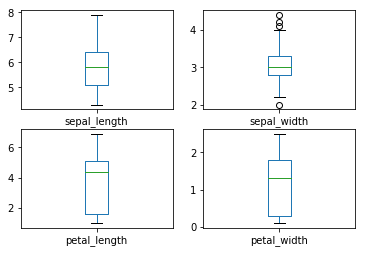

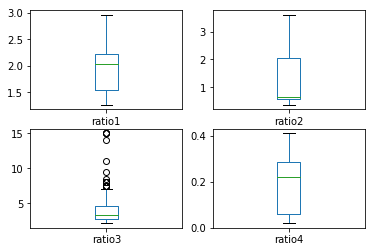

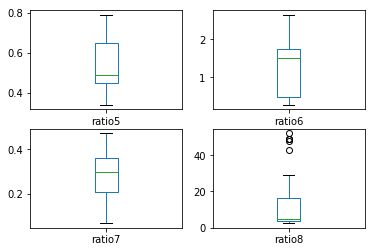

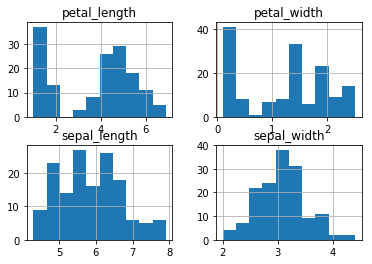

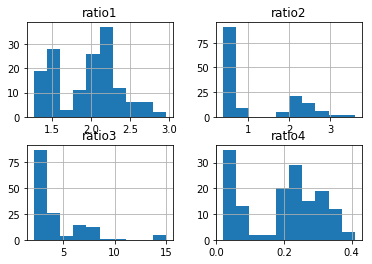

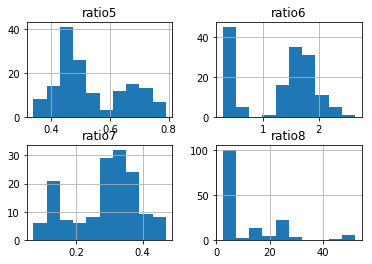

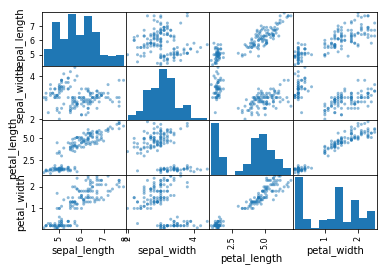

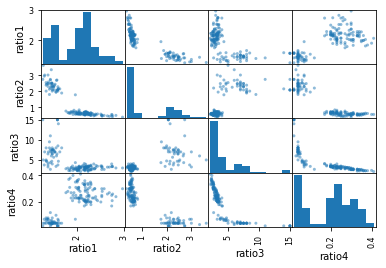

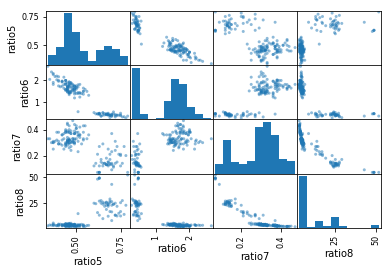


Scores from cross validation:  [1.         0.96774194 0.96666667 0.96428571]
Mean accuracy score from Cross Validation 0.974673579109063
Std from Cross Validation 0.01467560612836759

The accuracy: 0.9
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

The Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
Save Result in a CSV file ... ... ...
Save Result in a MySQl Table ... ... ...

End-to-End Applied Machine Learning Recipes for Developers



In [3]:
## Data Pre-Processing
def preProcessingData(dataset):

    # 1. Data Cleaning
      # There is no missing value. 
      # We could "Outlier treatment" but nothing was done here.  

    # 2. Feature Selection
    cols_X = ['sepal_length','sepal_width','petal_length','petal_width',
              'ratio1','ratio2','ratio3','ratio4',
              'ratio5','ratio6','ratio7','ratio8']
    cols_Y = 'class'
    seed = 7

    # 3. Data Transform - Split out train : test datasets
    train_X, test_X, train_Y, test_Y = train_test_split(dataset.loc[:, cols_X], 
                                                        dataset.loc[:, cols_Y], 
                                                        test_size=0.20,
                                                        random_state = seed
                                                        )
    return train_X, test_X, train_Y, test_Y

## Applied Machine Learning Algorithm ... ... ...
def evaluateAlgorithm(train_X, test_X, train_Y, test_Y):
    
    ##Machine Lreaning Algorithm, Parameter setting 
    model_LR = LogisticRegression()
    
    ##Cross Validation
    cv_results = cross_val_score(model_LR, train_X, train_Y, cv = 4, 
                                 scoring='accuracy', n_jobs = -1, verbose = 0)
    
    print("\nScores from cross validation: ", cv_results)
    print("Mean accuracy score from Cross Validation", cv_results.mean())
    print("Std from Cross Validation", cv_results.std())

    ##Training & Fitting Algorithm with training Dataset
    trained_Model = model_LR.fit(train_X, train_Y)

    ##Evaluation of trained Algorithm (or Model) and result
    pred_Class          = trained_Model.predict(test_X)
    acc         = accuracy_score(test_Y, pred_Class)
    classReport = classification_report(test_Y, pred_Class)
    confMatrix  = confusion_matrix(test_Y, pred_Class) 
    print('\nThe accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classReport))
    print('The Confusion Matrix:\n {}'.format(confMatrix))
    
    #Save the trained Model
    with open('trainedModel_LR.pickle', 'wb') as f:
        pk.dump(trained_Model, f)

## Load a (new or existing ) dataset to make prediction 
def loadPredictionDataset():
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")

    # MySQL Query - New Query is required for Prediction DataSet
    query = '''
    SELECT  sepal_length, 
            sepal_width, 
            petal_length, 
            petal_width, 
            round(sepal_length/sepal_width,2) as ratio1, 
            round(sepal_width/petal_length,2) as ratio2,
            round(petal_length/petal_width,2) as ratio3,
            round(petal_width/sepal_length,2) as ratio4,
            round(sepal_width/sepal_length,2) as ratio5, 
            round(petal_length/sepal_width,2) as ratio6,
            round(petal_width/petal_length,2) as ratio7,
            round(sepal_length/petal_width,2) as ratio8
    FROM irisdata;
    '''
    query_result = conn.execute(query)
    dataset =  pd.DataFrame(query_result.fetchall(), 
                            columns =  query_result.keys())
    conn.close()
    return dataset

## Load the trained model and make prediction
def loadTrainedModelForPrediction(pred_dataset):
    f = open('trainedModel_LR.pickle', 'rb')
    model = pk.load(f); f.close();
    pred_Class = model.predict(pred_dataset)
    pred_dataset.loc[:, 'classResult'] = pred_Class
    return pred_dataset

## Finalise the results and update the audiance
def finaliseResult(result):

    #Save Result in a CSV file
    print("Save Result in a CSV file ... ... ...")    
    result.to_csv('finalResult.csv', index = False)
    
    #Save Result in a MySQl Table
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")

    print("Save Result in a MySQl Table ... ... ...")    
    result.to_sql(name='irisresult', con=engine, schema='datasciencerecipes', 
                   if_exists = 'replace', chunksize = 1000, index=False)
    conn.close()

# End-to-End Applied Machine Learning Recipes for Beginners and App-Developers
if __name__ == '__main__':
    filename = 'iris.data.csv'
    
    # 2. Load Dataset to which Machine Learning Algorithm to be applied
    dataset = loadFrCSVFile(filename)
    import2MySQL(dataset)
    dataset = loadDataSetFrMySQLTable()
    
    # 3. Summarisation of Data to understand dataset (Descriptive Statistics)
    summariseDataset(dataset)
    
    # 4. Visualisation of Data to understand dataset (Plots, Graphs etc.)
    visualiseDataset(dataset)
    
    # 5. Data pre-processing and Data transformation (split into train-test datasets)
    train_X, test_X, train_Y, test_Y = preProcessingData(dataset)
    
    # 6. Application of a Machine Learning Algorithm to training dataset 
    evaluateAlgorithm(train_X, test_X, train_Y, test_Y)
    
    # 7. Load the saved model and apply it to new dataset for prediction 
    pred_Dataset = loadPredictionDataset()
    result = loadTrainedModelForPrediction(pred_Dataset)
    finaliseResult(result)
    
    print('\nEnd-to-End Applied Machine Learning Recipes for Developers\n')